La ecuación de Duffing, es una ecuación diferencial no lineal que describe el movimiento de un oscilador con amortiguamiento, con coeficiente de elasticidad no lineal y al cual se le aplica un forzamiento periódico, 

          x'' + δ x' + α x + β x^3 =  γ cos (ω t)

donde α (rigidez) , β (no linearidad) , γ (amplitud de forzamiento), δ (amortiguamiento) y ω (frecuencia de forzamiento) son constantes.


En esta actividad se pide resolver numéricamente la ecuación de Duffing utilizando la función ode de SciPy para reproducir la figura que aparece al inicio de esta actividad en el caso de que α = γ = 1.0 y amortiguamiento δ = 0.1.

In [1]:
#Importamos las bibliotecas
from math import cos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

In [13]:
grafs5 = []
w5 = []

for i in range(0,251):
    
    #Definimos las ecuaciones diferenciales y los parámetros
    def f(t, z, p):
        """"
         Lado derecho de las ecuaciones diferenciales
          dx/dt = y
          dy/dt = - δ*y - α*x - β*x**3 + γ*cos(ω*t)
        
        """
        δ, α, β, γ, ω = p                           #Parámetros de nuestra integral
        x, y = z                                    #Parámetros de integración
        f = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  #Función a integrar
        
        return f
    
    #Creamos una instancia para resolver la ecuación diferencial a través del método 'dopri5'
    solver = ode(f)
    solver.set_integrator('dopri5')
    
    #Especificamos los parámetros de la ecuación a nuestra función
    γ = 1.0
    α = 1.0
    β = 0.0
    δ = 0.1
    ω = i*0.01
    val = δ, α, β, γ, ω                      
    solver.set_f_params(val)
    
    # Fijamos el valor inical z(0) = z0
    t0 = 0.0
    z0 = [1.0, 0]
    solver.set_initial_value(z0, t0)
    
    #Creamos un arreglo de valores de tiempo t para los cuales evalue la solución; creamos también un arreglo que 
    #almacene los valores obtenidos
    t1 = 40
    n = 400
    t = np.linspace(t0, t1, n)
    sol = np.empty((n, 2))
    sol[0] = z0
    
    #Llamamos repetidamente al integrador para que avance en la solución un tiempo 'k'
    k = 1
    
    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1
        
    x = sol[:,0]
    w5.append(ω)
    
    if abs(min(x)) < max(x):
        grafs5.append(max(x))
    elif abs(min(x)) > max(x):
        grafs5.append(abs(min(x)))   


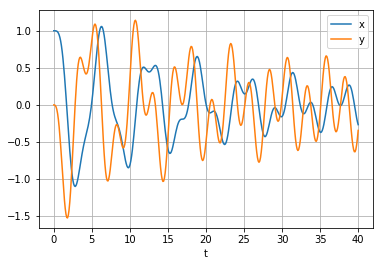

In [3]:
# Plot the solution...
plt.plot(t, x, label='x')
plt.plot(t, sol[:,1], label='y')
plt.xlabel('t')
plt.grid(True)
plt.legend()
plt.show()

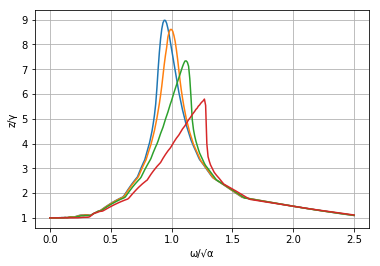

In [15]:
plt.plot(w1,grafs1,label="x")

plt.plot(w2,grafs2,label="x")

plt.plot(w3,grafs3,label="x")

plt.plot(w4,grafs4,label="x")

plt.xlabel("ω/√α")
plt.ylabel("z/γ")
plt.grid(True)
